# datascience-intern
Don't assess this one. I tested and tried it ,
Data Science Intern Coding Assignment

Problem Statement 1:
You have been provided with a dataset containing information about housing prices in a particular city. The dataset includes features such as the number of bedrooms, square footage, location, and sale prices of houses. Your task is to build a regression model that can predict the sale price of a house based on the given features.

Dataset:
The dataset is provided in a CSV file called "housing_data.csv" in the code repository. It contains the following columns:

Bedrooms: Number of bedrooms in the house Bathrooms: Number of bathrooms in the house SquareFootage: Total square footage of the house Location: Categorical variable representing the neighborhood of the house SalePrice: Sale price of the house in dollars Your task:

Load the dataset from the CSV file and perform any necessary data preprocessing steps.
Split the data into training and testing sets - first 50 is the training data and remaining is test data
Build a regression model using any machine learning algorithm of your choice.
Train the model using the training data.
Evaluate the performance of the model using appropriate evaluation metrics.
Use the trained model to make predictions on the testing data.
Calculate the root mean squared error (RMSE) between the predicted prices and the actual prices.
Save the trained model to a file for future use.
Note: Feel free to use any libraries or packages you are comfortable with for data preprocessing, model building, and evaluation.

In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import joblib 




In [62]:
#loading dataset from the csv file
data=pd.read_csv('housing_data.csv')
data.head(10)




,Bedrooms,Bathrooms,SquareFootage,Location,SalePrice
0,3,2.0,1800,A,250000
1,4,3.0,2200,B,320000
2,2,1.0,1200,A,180000
3,3,2.5,2000,C,280000
4,4,2.5,2400,B,350000
5,3,2.0,1900,C,260000
6,2,1.5,1400,A,200000
7,4,3.0,2300,B,330000
8,3,2.5,2100,C,290000
9,1,1.0,900,A,150000


In [63]:
# perform data preprocessing
import pandas as pd

print(data.columns)

#normalizing numerical features

data['SquareFootage'] = (data['SquareFootage'] - data['SquareFootage'].mean()) / data['SquareFootage'].std()




Index(['Bedrooms', 'Bathrooms', 'SquareFootage', 'Location', 'SalePrice'], dtype='object')


In [64]:
#convert the location column to numeric using one hot encoding
#data['Location'] = data['Location'].str.strip()

data = pd.get_dummies(data, columns =['Location'], drop_first=True)

In [66]:
#split the data into training and test set
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

# spliting the datsest into train and test set 50 50 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state =42)

In [67]:
#build and train a regression model using random forest
model = RandomForestRegressor(n_estimators = 100, random_state =42 )
# train the model using training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:

# evaluating the model performance using rmse 

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared = False)

print(f'root mean squared error (RMSE): {rmse:.2f}')

root mean squared error (RMSE): 6412.37


In [72]:
# check predictions

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

predictions = model.predict(X_test)

# calculate evaluation metric
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# print the evaluation metrics
print ("mean squared error (MSE): " , mse)
print ("mean absolute error (MAE): " , mae)
print ("root mean squared error (RMSE): " , rmse)
print ("r squared error (R2): " , r2)

mean squared error (MSE):  41118529.4117647
mean absolute error (MAE):  4032.3529411764707
root mean squared error (RMSE):  6412.373149760134
r squared error (R2):  0.9904920648890845


In [73]:
## A lower RMSE and MAE implies better performance 
# While a higher R2 values closer to 1 implies better fit to the model


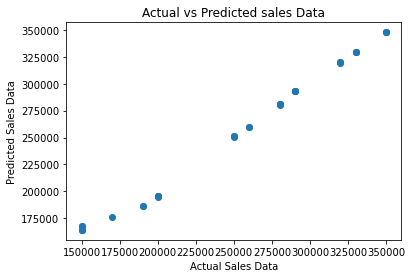

In [75]:
import matplotlib.pyplot as plt
# plot predicted values vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales Data")
plt.ylabel("Predicted Sales Data")
plt.title("Actual vs Predicted sales Data")
plt.show()

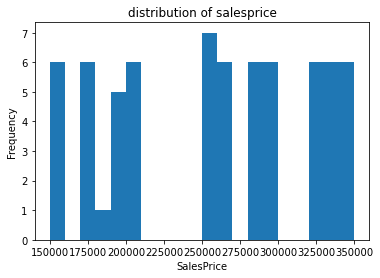

In [85]:
## let us visualize more 

plt.hist(data["SalePrice"],bins=20)
plt.xlabel("SalesPrice")
plt.ylabel("Frequency")
plt.title("distribution of salesprice")
plt.show()

In [91]:
# let us find outliers 
import seaborn as sns
sns.boxplot(x="Location", y="SalePrice", data=data)
plt.xlabel("Location")
plt.ylabel("SalePrice")
plt.title("Distribution of salesprice by location")
plt.show()


ValueError: Could not interpret input 'Location'